In [2]:
# importing basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [3]:
test_tmp = pd.read_csv("SalaryData_Test(1).csv")
train_tmp = pd.read_csv("SalaryData_Train(1).csv")


In [4]:
df_tmp = test_tmp.append(train_tmp)
test = test_tmp.copy()
train = train_tmp.copy()


C:\Users\sanky45\AppData\Local\Temp\ipykernel_12996\2331154244.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tmp = test_tmp.append(train_tmp)


In [5]:
test.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
train.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]


In [9]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()


In [10]:
for i in str_c:
    train[i]= number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])


In [11]:
test.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [12]:
train.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [13]:
mapping = {' >50K': 1, ' <=50K': 2}


In [14]:
train = train.replace({'Salary': mapping})
test = test.replace({'Salary': mapping})


In [15]:
df = train.append(test) 


C:\Users\sanky45\AppData\Local\Temp\ipykernel_12996\3831776264.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


In [16]:
df1 = df.copy()


In [17]:
df1.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2


In [18]:
df1.shape


(45221, 14)

In [19]:
df1.describe()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,2.204507,10.313217,10.118463,2.585148,5.969572,1.412684,3.680281,0.675062,1101.454700,88.548617,40.938038,35.431503,1.752151
std,13.217981,0.958132,3.816992,2.552909,1.500460,4.026444,1.597242,0.832361,0.468357,7506.511295,404.838249,12.007640,5.931380,0.431769
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,2.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,2.000000
75%,47.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,2.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,2.000000


In [20]:
df1.isnull().sum()


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [21]:
corr = df1.corr()


<AxesSubplot:>

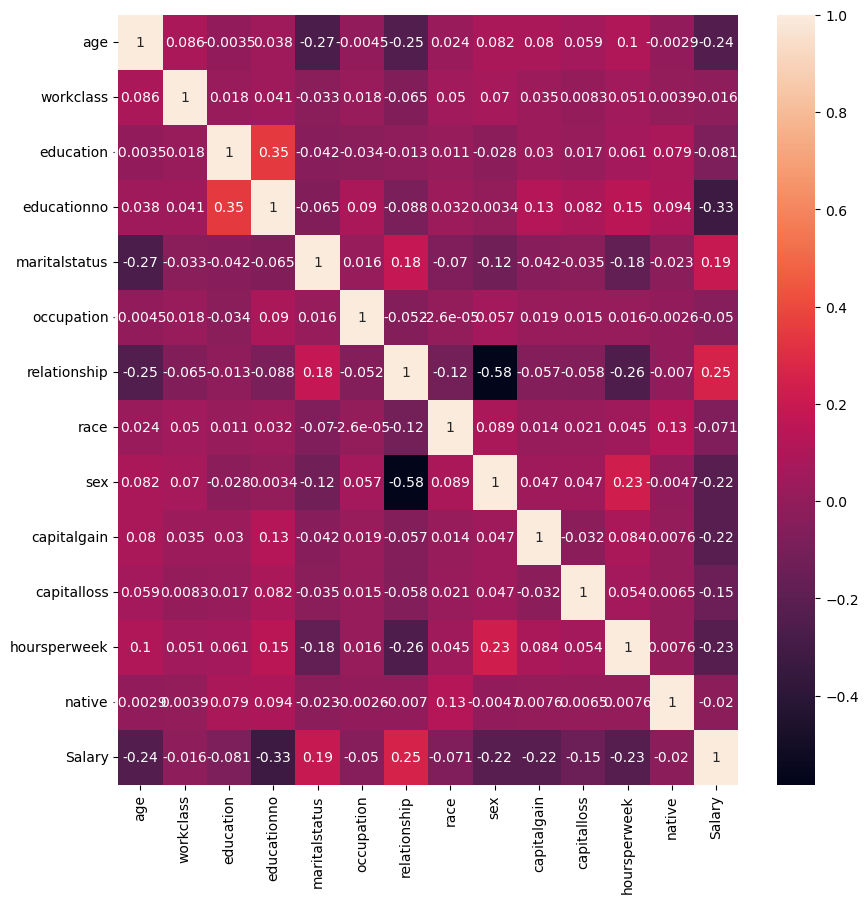

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)


## Model Training

In [23]:
# train data
x_train = train.drop(columns=["Salary"])
y_train = train["Salary"]

# test data
x_test = test.drop(columns=["Salary"])
y_test = test["Salary"]

### Data Standardization

In [24]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Model on the deafault paramters

In [25]:
svc = SVC()
svc.fit(x_train, y_train)
base_pred = svc.predict(x_test)
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

           1       0.76      0.55      0.64      3700
           2       0.87      0.94      0.90     11360

    accuracy                           0.85     15060
   macro avg       0.81      0.75      0.77     15060
weighted avg       0.84      0.85      0.84     15060



### Using Grid Search method to findout best performing hyperparameters

In [26]:
param_grid = {'C' : [0.1,0.5,0.9],
              'kernel':['rbf','linear','sigmoid']}
svc = SVC()

In [27]:
grid_model = GridSearchCV(estimator=svc, param_grid=param_grid, cv = 5)
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 0.9],
                         'kernel': ['rbf', 'linear', 'sigmoid']})

In [28]:
#check best best perfroming estimators
grid_model.best_estimator_

SVC(C=0.9)

In [29]:
# checking best perfroming hyperparamerter values for SVM
grid_model.best_params_

{'C': 0.9, 'kernel': 'rbf'}

In [30]:
# predictions on test data
final_pred = grid_model.predict(x_test)

In [31]:
#classification report
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           1       0.76      0.55      0.64      3700
           2       0.87      0.94      0.90     11360

    accuracy                           0.85     15060
   macro avg       0.81      0.75      0.77     15060
weighted avg       0.84      0.85      0.84     15060



In [32]:
print(grid_model.score(x_train,y_train))
print(grid_model.score(x_test,y_test))

0.8508338582938232
0.8460159362549801
